## Bike Sharing Data - Applicant Test
### Oliver Feindt - 19.06.2016

Analysis of the Bike Sharing Data Set found at https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset. The following steps are performed:
1. Data preparation
2. Explorative data analysis
3. Prediction modelling and testing
4. Next steps

Note: the following libraries in Python 3 are used:
- numpy
- pandas
- matplotlib / pylab
- scikit learn 

### 1. Data preparation

In [1]:
import pandas as pd
import numpy as np

# read the datasets via pandas
hourly = pd.read_csv('hour.csv') # hourly bike rentals
daily = pd.read_csv('day.csv') # daily bike rentals

In [3]:
# have a look at daily set
daily.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# more importantly, hourly set
hourly.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Task:
- explorative analysis of the data set
- prediction model for the number of hourly bike rentals 'cnt'

Which variables are there?
- Independent variables that can be used for a prediction are in column 2 - 13 (time data and weather data)
- cnt = registered + casual, the number of rentals is shown in more detail by the number of casual rentals and rentals by registered customers

Hypothesis on bike usage dependencies. Which variables  have an influence on the number of bike rentals?
- the weather (weathersit, temperature, humidity, windspeed) should have an influence on the number of rentals
- the season should therefore also have an influence
- time -> workingday or weekend / holiday
- time of day -> there should be more rentals during rush hour when people go to or come home from work

#### 1.1 Check for missing data

In [2]:
# check for hourly set
hourly.shape == hourly.dropna().shape # true if no data is missing 'nan'

True

In [3]:
# same for daily set
daily.shape == daily.dropna().shape

True

- no missing values!

#### 1.2 Check for outliers

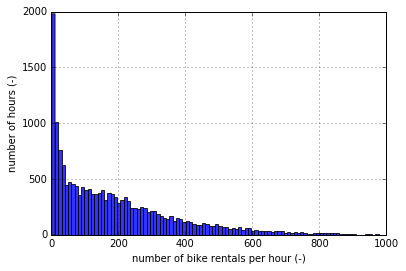

In [4]:
import pylab as p
%matplotlib inline

# plot hourly utilization (cnt) in a histogram
hourly['cnt'].hist(bins=100, alpha = .8)
p.xlabel('number of bike rentals per hour (-)')
p.ylabel('number of hours (-)')
p.show()

- No, or close to no rentals during many hours. Makes sense, e.g. night
- Maybe daily utilization is more interesting for outliers:

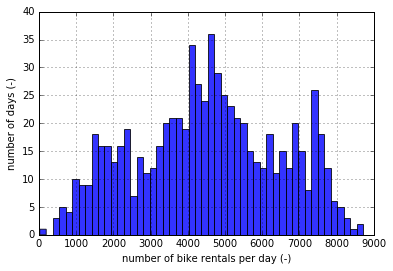

In [5]:
# plot daily utilization
daily['cnt'].hist(bins = 50, alpha = .8)
p.xlabel('number of bike rentals per day (-)')
p.ylabel('number of days (-)')
p.show()

- Most days show 4000 - 5000 rentals
- only very few days show less than 500 rentals or more than 8500
- More detailed look at data needed

### 2. Explorative Data Analysis

- Analysis of previously made hypotheses
- Does the number of rentals really correlate with weather and time?

#### 2.1 Weather Data

The following variables can be analyzed here:
- weathersit (clear, cloudy, light rain, heavy rain)
- temp (temperature)
- atemp (feeling temperature)
- hum (humidity)
- windspeed
- season (spring, summer, fall, winter)

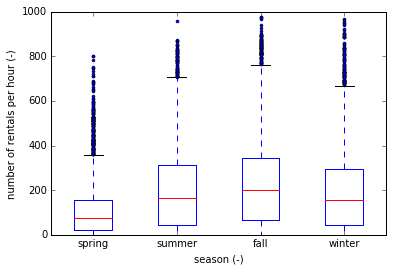

In [7]:
# analyse hourly rentals depending on season
seasondata = [] # prepare list for a boxplot

# use loop to add counts for each season to the list
for i in range(1, 5):
    seasondata.append(hourly[hourly['season'] == i]['cnt'])
    
# Use a boxplot to visualize
p.boxplot(seasondata, sym = '.') # outliers marked by '.'
p.xlabel('season (-)')
p.ylabel('number of rentals per hour (-)')
p.xticks([1, 2, 3, 4], ['spring', 'summer', 'fall', 'winter'])
p.show()

- the influence of the season on the number of bike rentals can be confirmed: the usage is the highest in fall and the lowest in spring
- in fall there are on average ca. 200 rentals per hour, while in spring the number of rentals is below 100 / hour

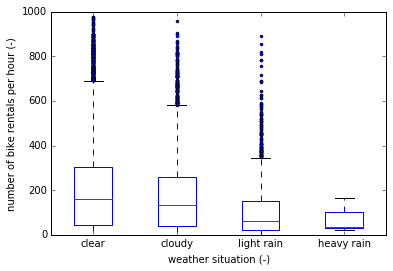

In [8]:
# analyse hourly rentals depending on weather category. There are four weather categories:
# 1 = clear
# 2 = cloudy
# 3 = light rain
# 4 = heavy rain

# Find rentals for each weather category
weatherdata = [] # prepare list for boxplot

# use loop to add counts for each weather category to the list
for i in range(1, 5):
    weatherdata.append(hourly[hourly['weathersit'] == i]['cnt'])

# Use a boxplot to visualize
p.boxplot(weatherdata, sym = '.')
p.ylabel('number of bike rentals per hour (-)')
p.xlabel('weather situation (-)')
p.xticks([1, 2, 3, 4], ['clear', 'cloudy', 'light rain', 'heavy rain'])
p.show()

- Weather 1 and 2 (corresponding to clear and few clouds) show most rentals and also the highest variance with most outliers
- Weahter 3 (light rain) already shows less, and 4 (heavy rain) almost no rentals
- Confirms that weather is related to bike rentals

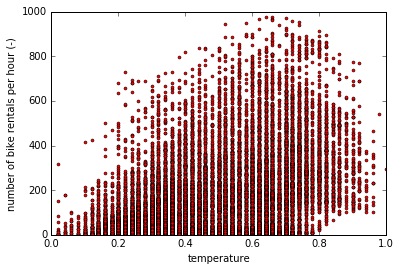

In [9]:
# plot the hourly rentals over the temperature in a scatter plot
p.plot(hourly['temp'], hourly['cnt'], 'ro', markersize = 3.0)
p.xlabel('temperature')
p.ylabel('number of bike rentals per hour (-)')
p.show()

In [10]:
# calculate the correlation between temperature and hourly rentals:
hourly['temp'].corr(hourly['cnt'])

0.40477227577865882

- a positive correlation can be observed between the temperature and the number of bike rentals

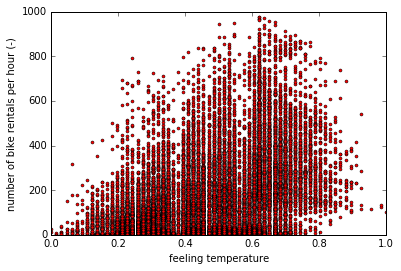

In [11]:
# plot the same for the feeling temperature
p.plot(hourly['atemp'], hourly['cnt'], 'ro', markersize = 3.0)
p.xlabel('feeling temperature')
p.ylabel('number of bike rentals per hour (-)')
p.show()

In [12]:
# calculate the correlation between feeling temperature and hourly rentals
hourly['atemp'].corr(hourly['cnt'])

0.40092930412663186

- the correlation between feeling temperature and hourly rentals is very similar to the one with normal temperature
- now, humidity and wind speed are left. Directly calculate the correlation to evaluate:

In [13]:
# calculate the correlation between humidity and hourly rentals
hourly['hum'].corr(hourly['cnt'])

-0.32291074082456028

In [14]:
# calculate the correlation between windspeed and hourly rentals
hourly['windspeed'].corr(hourly['cnt'])

0.093233783926125344

Result:
- almost no correlation with windspeed -> does not really matter
- negative correlation with humidity, i.e. lower humidity = more rentals

Next, analyze hourly rentals depending on time.


#### 2.2 Time

The following variables can be analyzed here:
- season (already analyzed in terms of weather)
- yr
- mnth
- hr
- holiday
- weekday
- workingday

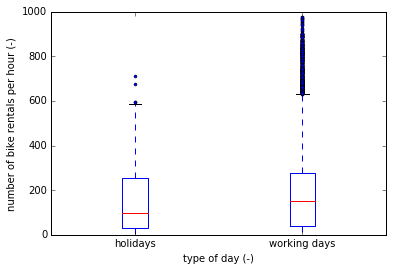

In [15]:
# analyse hourly rentals depending on type of day (holiday, workingday)
holidays = hourly[hourly['holiday'] == 1]['cnt']
workingdays = hourly[hourly['workingday'] == 1]['cnt']

# boxplot for workingdays and holidays
p.boxplot([holidays, workingdays], sym = '.')
p.xlabel('type of day (-)')
p.ylabel('number of bike rentals per hour (-)')
p.xticks([1, 2], ['holidays', 'working days'])
p.show()

- The mean of workdays was higher than on holidays -> possibly because people use rental bikes to go to work
- Also the variance and number of outliers are higher on working days

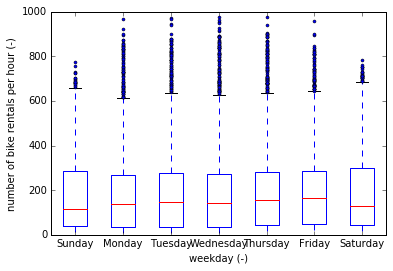

In [17]:
# analyse hourly rentals depending on weekday
weekdays = []
# use loop to add counts for days to th list
for i in range(0, 7):
    weekdays.append(hourly[hourly['weekday'] == i]['cnt'])

p.boxplot(weekdays, sym = '.')
p.xlabel('weekday (-)')
p.ylabel('number of bike rentals per hour (-)')
p.xticks([1, 2, 3, 4, 5, 6, 7], ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
p.show()

- No significant difference in mean between weekdays (slightly lower number of rentals on weekends), but less outliers on weekends
- Furhter analysis possible: what about weekends vs holidays vs workdays

In [18]:
# create new column for weekend
hourly['weekend'] = 1
hourly.loc[(hourly['holiday'] == 1),'weekend'] = 0
hourly.loc[(hourly['workingday'] == 1),'weekend'] = 0

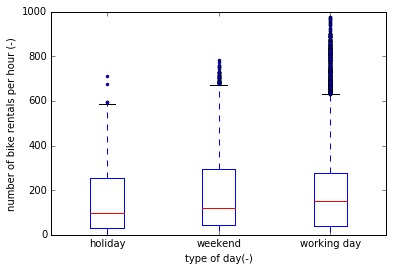

In [19]:
# analyse hourly rentals depending on type of day (holiday, workingday, weekend)
holidays = hourly[hourly['holiday'] == 1]['cnt']
weekends = hourly[hourly['weekend'] == 1]['cnt']
workingdays = hourly[hourly['workingday'] == 1]['cnt']

# boxplot for workingdays and holidays
p.boxplot([holidays, weekends, workingdays], sym = '.')
p.xlabel('type of day(-)')
p.ylabel('number of bike rentals per hour (-)')
p.xticks([1, 2, 3], ['holiday', 'weekend', 'working day'])
p.show()

- usage the lowest on holidays, then weekends
- mean usage the highest on working days
- number of outliers is the highest on working days
- overall, impact of time (days) visible on number of bike rentals
- but influence of daytime might be stronger

Next step: analyze daily hours

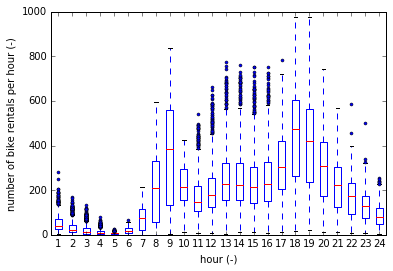

In [20]:
# analyse hourly rentals depending on time of day
# create list for boxplot:
hourlist = []
for i in range(0, 24):
    hourlist.append(hourly[hourly['hr'] == i]['cnt'])

# boxplot for rentals per hour
p.boxplot(hourlist, sym = '.')
p.xlabel('hour (-)')
p.ylabel('number of bike rentals per hour (-)')
p.show()

- impact of daytime much clearer on bike rentals
- peaks during rush hour (8-9 and 18-19)
- in between numbers are not as high but show a lot of outliers
- at night, between 1 and 6, the numbers are very low

#### 2.3 Result of the Analyses
- impact of weather and time on number of bike rentals was shown
- for weather the conditions (clear, cloudy, rain) have the biggest impact but temperature and humidity are also a factor
- regarding time, the time of day and especially rush hour have the biggest impact
- it was also shown that usage is higher on working days compared to non-working days (weekends / holidays)

### 3. Prediction Modeling and Testing
#### 3.1 Scoring Methods


At first, define method to be used for scoring of the model predictions

In [21]:
# mean absolute error as in task
def MAE(predictions, truth):
    n = len(predictions)
    ae = 0
    for (prediction, cnt) in zip(predictions, truth):
        ae += abs(prediction-cnt)
    return ae/n

- Now, different models can be used for predicting the houlry bike rentals based on the weather and time data
- Two different methods are attempted here:
    - Support Vector Machines
    - and Random Forests

#### 3.2 Support Vector Machines

- Try Support Vector Machine (SVM) regression with a built in function in scikit learn

In [22]:
# import the functions from scikit learn
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split

# first, split hourly data into a training set and test set -> randomly selects 10% of data as test set
train, test = train_test_split(hourly, test_size = 0.1)

# create model
hourlyregress = SVR()
# fit model (use column 2 - 13 of training set as feature vector, column 16 (cnt) as reference)
hourlyregress.fit(train.values[0::, 2:14].astype(int), train.values[0::, 16].astype(int)) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [25]:
# make predictions with the test set with the SVM model
predictions = hourlyregress.predict(test.values[0::, 2:14])

# evaluate model by scoring with the mean average error function
score = MAE(predictions, test.values[0::, 16].astype(int))
score

71.407363623559135

- MEA of ~70, so on average: reality = prediction +/- 70
- that's not very good yet

How to improve results of SVM?
- feature scaling important, but features already more or less scaled
- tuning of C (used for regularization, lower C means more regularization)
    - before, no C was given explicitly to the algorithm, so a C of 1 was used
- next step tries different values for C and scores each new model. 
- **Note: this could take a long time!**

In [26]:
scores = []
# test values of C from 0.1 to 30:
Cs = [0.1, 0.3, 1, 3, 10, 30]
for i in Cs:
    # create model with C from list
    hourlyregress = SVR(C = i)
    # fit model (use column 2 - 13 of training set as feature vector, column 16 (cnt) as reference)
    hourlyregress.fit(train.values[0::, 2:14].astype(int), train.values[0::, 16].astype(int)) 
    # predict the test set cnt
    predictions = hourlyregress.predict(test.values[0::, 2:14])
    predictions[ predictions < 0 ] = 0
    # score with MAE and append the score to the scores list
    scores.append(MAE(predictions, test.values[0::, 16].astype(int)))
scores

[108.13654167663327,
 88.122486365062429,
 71.399189716996275,
 58.866981846524169,
 48.683200528750426,
 43.154836601518852]

- C of 30 performed best -> MEA of 43, so on average: reality = prediction +/- 43
- this is already a lot better
- but low regularization parameter indicated the model may be overfitting
- this should be analyzed in more detail!

#### 3.3 Random Forest

- try using a random forest regressor from scikit learn

In [27]:
# use random forest for prediction
from sklearn.ensemble import RandomForestRegressor

# split hourly data into a training set and test set -> randomly selects 10% of data as test set
train, test = train_test_split(hourly, test_size = 0.1)

# fit the random forest regressor
hourlyforest = RandomForestRegressor(n_estimators = 10)
hourlyforest = hourlyforest.fit(train.values[0::, 2:14].astype(int), train.values[0::, 16].astype(int))

In [28]:
# predict the cnt for test values and score using MAE
predictions = hourlyforest.predict(test.values[0::, 2:14])
predictions[ predictions < 0 ] = 0
score = MAE(predictions, test.values[0::, 16].astype(int))
score

35.624678384203712

In [29]:
# score using the built in score function (evaluates the R² score -> percentage of variance retained)
score = hourlyforest.score(test.values[0::, 2:14], test.values[0::, 16])
score

0.89893275548878693

- MAE of ~ 35
- and ~90% of variance retained (R² score)
- already better than SVM
- try tuning number of estimators for random forest: more estimators should result in a better prediction
- But again: **this could take a long time!**

In [30]:
scores = [] # empty lists for score of each random forest (with different number of estimators)
nb_estimators = [3, 10, 30, 100, 300]

for nb in nb_estimators:
    # fit the random forest regressor
    hourlyforest = RandomForestRegressor(n_estimators = nb)
    hourlyforest = hourlyforest.fit(train.values[0::, 2:14].astype(int), train.values[0::, 16].astype(int))
    # make predictions
    predictions = hourlyforest.predict(test.values[0::, 2:14])
    predictions[ predictions < 0 ] = 0
    # calculate scores and add to list
    scores.append(MAE(predictions, test.values[0::, 16].astype(int)))
scores

[38.502043151410234,
 35.523218999546685,
 35.786951174597839,
 35.258862476738216,
 35.181788975696364]

- all models perform very similarly -> not a lot of improvement when using more predictors
- n_estimators = 30 is chosen here for final evaluation:

In [31]:
# split hourly data into a training set and test set -> randomly selects 10% of data as test set
train, test = train_test_split(hourly, test_size = 0.1)

# fit the random forest regressor
hourlyforest = RandomForestRegressor(n_estimators = 30)
hourlyforest = hourlyforest.fit(train.values[0::, 2:14].astype(int), train.values[0::, 16].astype(int))
# make predictions
predictions = hourlyforest.predict(test.values[0::, 2:14])
predictions[ predictions < 0 ] = 0
# calculate scores and add to list
mae = MAE(predictions, test.values[0::, 16].astype(int))
r_squared = hourlyforest.score(test.values[0::, 2:14], test.values[0::, 16])
mae, r_squared

(34.191917055369288, 0.89959217462688013)

- no real improvement achieved by optimizing the number of estimators
- the model has an MAE of about 35 and approximately 90% of the variance is retained (r² score)
- the random forest can be further tuned by setting a limit for the number of features it is allowed to use (this can be used to trade off variance and bias)
- overall, the random forest model performed better than the SVM and, based on only this comparison, would be continued to be tuned and used for predictions
- however, it would be necessary to also compare further algorithms before settling with the random forest model

### 4. Next Steps

Outlook on next steps:

- Explorative analysis not complete -> try to find more insight on data
    - e.g. analyze influence of time and weather on registered customer rentals vs casual customer rentals
    - registered customers could have a more regular rental behavior than casual customers (analyze this hypthesis)
    - this could be used to improve the prediction -> predict number of registered rentals and casual rentals separately instead of directly predicting cnt
    - outliers were only looked at very briefly. They could be looked at in more detail to find correlating events.

- Improvements for prediction inputs:
    - explorative analysis only used to analyze data
    - no conclusions drawn on model features
    - should be improved -> which additional features can be created to improve prediction / emphasize important features? Which features can perhaps be excluded from the model because they are not important?
    
- Improvements for prediction model:
    - so far, only SVM and random forest tried
    - also only basic implementation from scikit learn was used
    - tuning only performed for C (regularization parameter) for SVM and for number of estimators for random forest
    - especially tuning of the number of estimators for the random forest model had almost no impact
    - further tuning for these algorithms could result in better predictions
    - evaluation of other algorithms is also needed to choose the best one for the problem (e.g. Gradient Descent regression methods, neural networks) 